<a href="https://colab.research.google.com/github/Tavo826/DataScience/blob/main/DetectingParkinson'sDeseaseXGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**XGBoost (eXtreme Gradiente Boosting):** es un algoritmo basado en árboles de decisión que se enfoca en la velocidad y el rendimiento.

El dataset tiene 24 columnas y 195 variables

In [ ]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

os.chdir('/content/drive/MyDrive/Colab Notebooks/Data Science/Detección de parkinson')

In [ ]:
df = pd.read_csv('parkinsons.data')
df.head(-1)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,phon_R01_S50_1,201.774,262.707,78.228,0.00694,0.00003,0.00412,0.00396,0.01235,0.02574,0.255,0.01454,0.01582,0.01758,0.04363,0.04441,19.368,0,0.508479,0.683761,-6.934474,0.159890,2.316346,0.112838
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


Las características son todas las columnas, excepto la columna 'status' que contiene la etiqueta

In [ ]:
features = df.loc[:, df.columns != 'status'].values[:,1:]
labels = df.loc[:, 'status'].values

In [ ]:
#Analizando las etiquetas
print('1: ', labels[labels==1].shape[0])
print('0: ', labels[labels==0].shape[0])

1:  147
0:  48


Se inicializa el MinMaxScaler y se escalan las características entre -1 y 1 para normalizarlos.

In [ ]:
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(features)
y = labels

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Realizando la predicción
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False,
                          title=None, cmap=plt.cm.Blues):
  
  if not title:
    if normalize:
      title = 'Normalized confusion matrix'
    else:
      title = 'Confusion matrix, without normalization'
  
  #Calulando la matriz de confusión
  cm = confusion_matrix(y_true, y_pred)
  print(cm)
  #Solo se usan las etiquetas que aparecen en los datos
  #classes = classes[unique_labels(y_true, y_pred)]
  if normalize: cm = 100 * cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax)

  #mostrando las etiquetas
  ax.set(xticks = np.arange(cm.shape[1]),
         yticks = np.arange(cm.shape[0]),
         xticklabels = classes, yticklabels=classes, 
         title = title,
         ylabel = 'True label',
         xlabel = 'Predicted label')
  
  #rotando los ejes
  plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
           rotation_mode='anchor')
  
  #Se recorren las dimensiones de los datos y se crean las anotaciones
  fmt = '.1f' if normalize else 'd'
  thresh = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      ax.text(j, i, format(cm[i,j], fmt),
              ha='center', va='center',
              color='white' if cm[i,j] > thresh else 'black')
  fig.tight_layout()
  return ax

[[ 6  2]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.93      0.84      0.88        31

    accuracy                           0.82        39
   macro avg       0.74      0.79      0.76        39
weighted avg       0.85      0.82      0.83        39



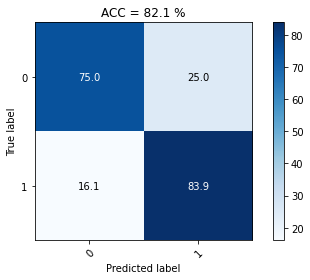

In [ ]:
plot_confusion_matrix(y_test, y_pred,
                      classes=np.unique(y),
                      normalize=True,
                      title='ACC = %.1f %%' % (100*score))

cr = classification_report(y_test, y_pred,
                           #labels = range(len(y)),
                           target_names = ['0', '1'])

print(cr)